<a href="https://colab.research.google.com/github/Dasika-Vaishnavi/Data-Structures-Lab-C/blob/main/competitive_coding_mid_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit - 4

# bfs
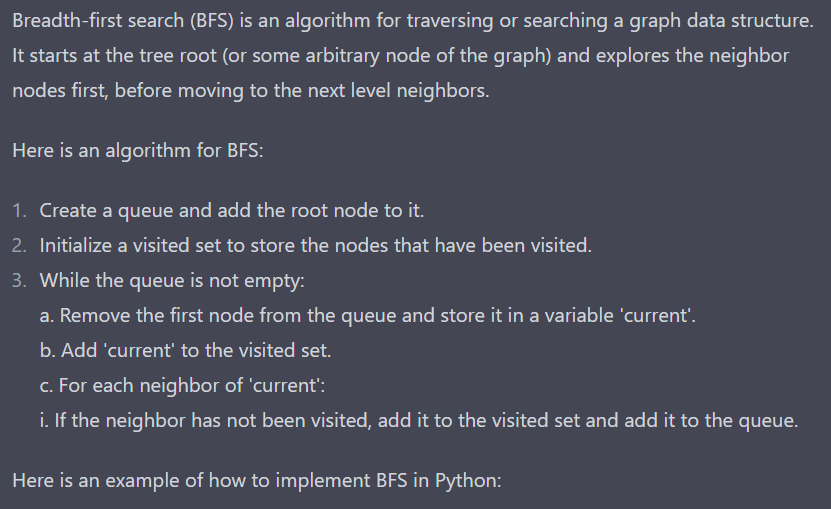

In [1]:
from collections import deque

def BFS(root, target):
    # create a queue and add the root node
    queue = deque([root])
    # initialize a visited set to store the visited nodes
    visited = set()

    while queue:
        # remove the first node from the queue
        current = queue.popleft()
        # add the current node to the visited set
        visited.add(current)
        # check if the current node is the target
        if current == target:
            return True
        # add the current node's neighbors to the queue
        for neighbor in current.neighbors:
            if neighbor not in visited:
                queue.append(neighbor)
    return False

# DFS
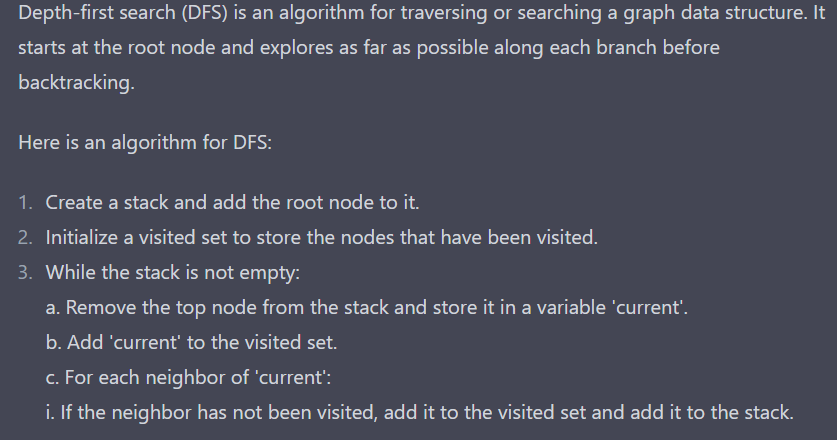

In [3]:
def DFS(root, target):
    # create a stack and add the root node
    stack = [root]
    # initialize a visited set to store the visited nodes
    visited = set()

    while stack:
        # remove the top node from the stack
        current = stack.pop()
        # add the current node to the visited set
        visited.add(current)
        # check if the current node is the target
        if current == target:
            return True
        # add the current node's neighbors to the stack
        for neighbor in current.neighbors:
            if neighbor not in visited:
                stack.append(neighbor)
    return False


# BST
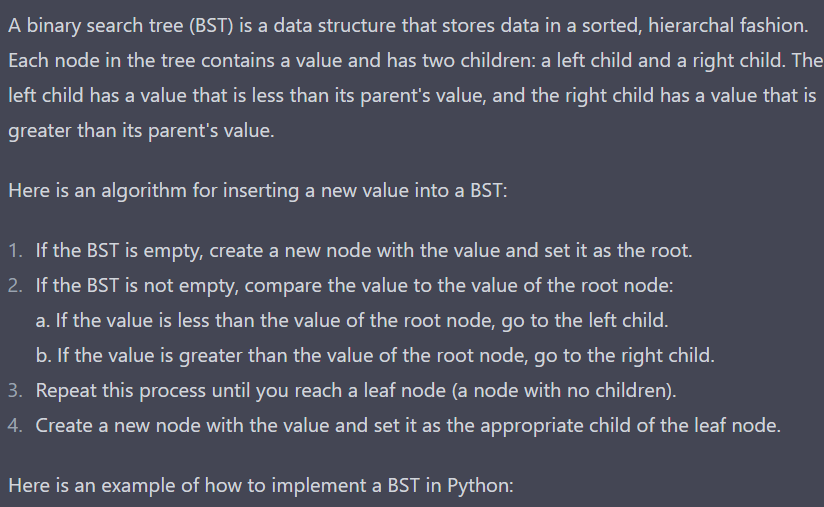

In [4]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return
        current = self.root
        while True:
            if value < current.value:
                if current.left is None:
                    current.left = new_node
                    break
                current = current.left
            else:
                if current.right is None:
                    current.right = new_node
                    break
                current = current.right


# Unit 5

# N-Queens Problem 
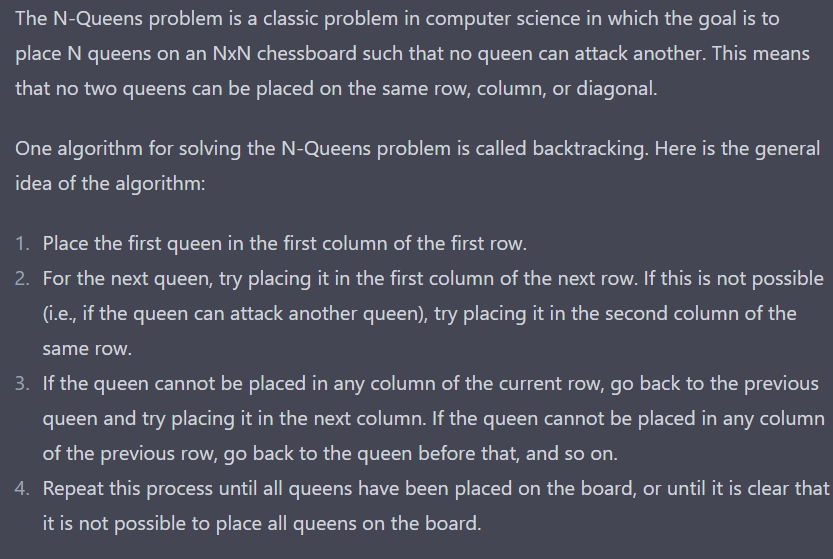


In [ ]:
def solve_n_queens(n):
    def can_place(board, row, col):
        # check if there is a queen in the same column
        for i in range(row):
            if board[i][col] == 1:
                return False
        # check if there is a queen on the same diagonal
        for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
            if board[i][j] == 1:
                return False
        for i, j in zip(range(row, -1, -1), range(col, n)):
            if board[i][j] == 1:
                return False
        return True

    def dfs(board, row):
        if row == n:
            result.append(board.copy())
            return
        for col in range(n):
            if can_place(board, row, col):
                board[row][col] = 1
                dfs(board, row + 1)
                board[row][col] = 0

    result = []
    dfs([[0] * n for _ in range(n)], 0)
    return result

print(solve_n_queens(4))

# The output of this code should be a list of all possible solutions to the 4-Queens problem, each represented as a 2D list. In this case, the output would be:

#[[[0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0]], [[0


# coin change problem
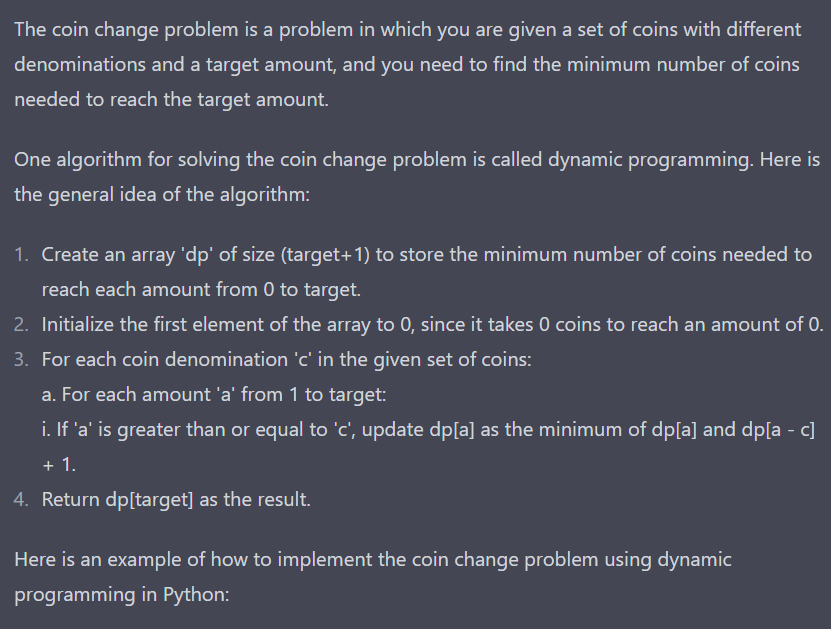

In [5]:
def coin_change(coins, target):
    # create an array to store the minimum number of coins needed to reach each amount
    dp = [float('inf')] * (target + 1)
    # initialize the first element to 0
    dp[0] = 0

    for c in coins:
        for a in range(1, target + 1):
            if a >= c:
                dp[a] = min(dp[a], dp[a - c] + 1)
    return dp[target]

print(coin_change([1, 5, 10, 25], 63))


6


# longest subsequence
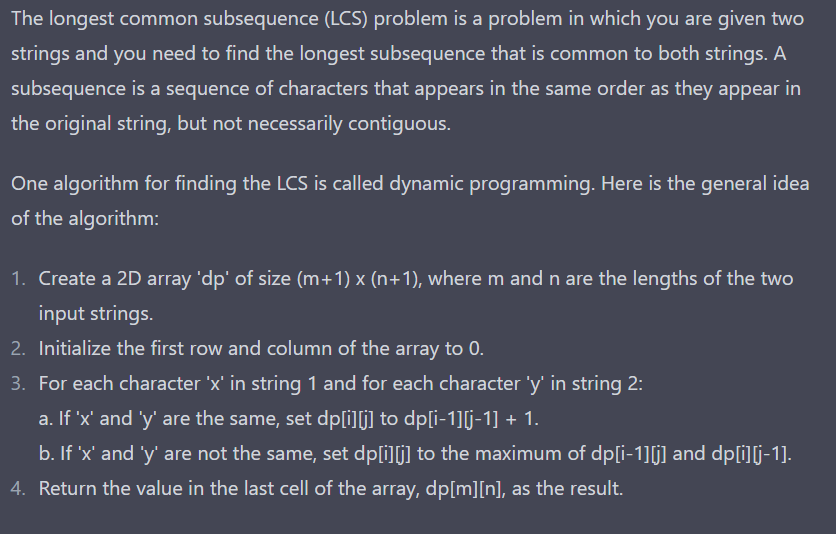

In [6]:
def longest_common_subsequence(s1, s2):
    m, n = len(s1), len(s2)
    # create a 2D array to store the LCS lengths
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    return dp[m][n]

print(longest_common_subsequence("abcbdab", "bdcaba"))


4


# maximum path sum in a triangle problem

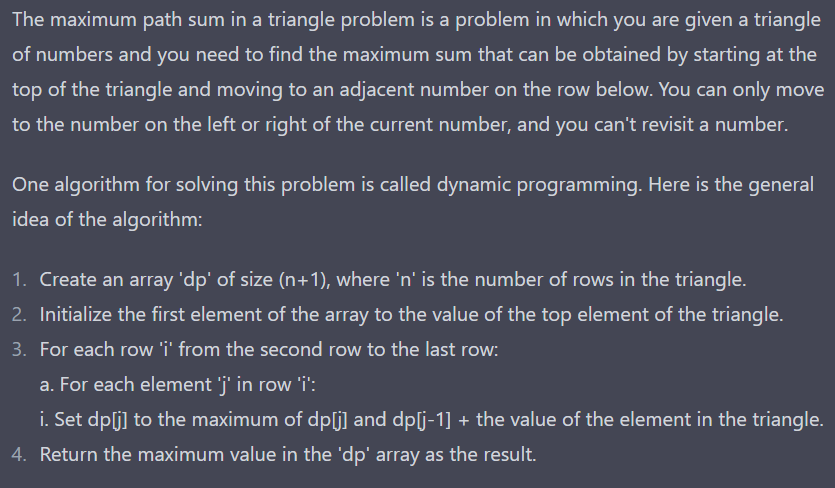



In [8]:
def max_path_sum(triangle):
    n = len(triangle)
    # create an array to store the maximum path sums
    dp = [0] * (n + 1)

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            dp[j] = max(dp[j], dp[j + 1]) + triangle[i][j]
    return dp[0]

print(max_path_sum([[3], [7, 4], [2, 4, 6], [8, 5, 9, 3]]))

""" This implementation takes a triangle of numbers represented as a 2D list as input and returns the maximum path sum. It uses a bottom-up approach to fill in the 'dp' array, starting from the bottom row and working up to the top.
The output of this code should be the maximum path sum of the given triangle. In this case, the output would be: 

This means that the maximum path sum of the given triangle is 23, and the path that yields this sum is 3 -> 7 -> 4
"""


23


# Minimum-Edit Distance Problem
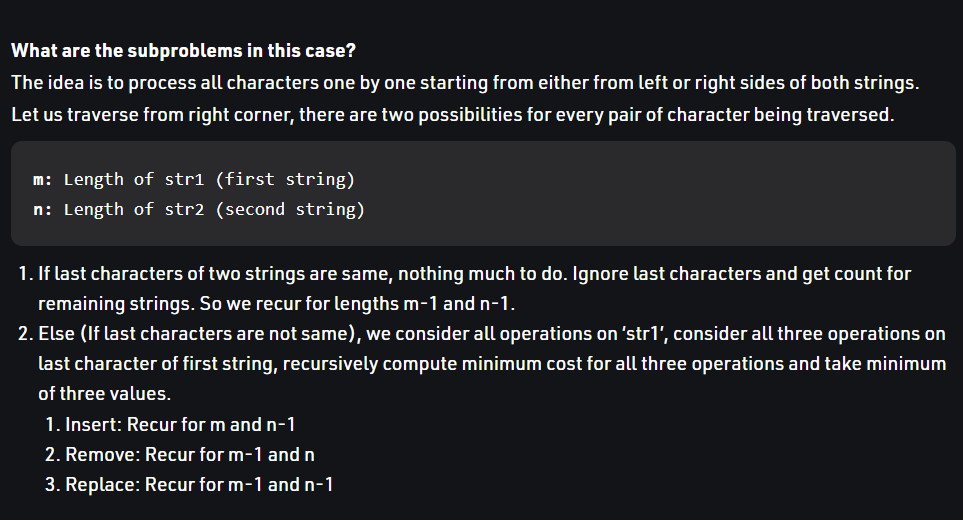

In [10]:
def editDistance(str1, str2, m, n):
	if m == 0:
		return n

	if n == 0:
		return m

	if str1[m-1] == str2[n-1]:
		return editDistance(str1, str2, m-1, n-1)

	return 1 + min(editDistance(str1, str2, m, n-1), # Insert
				editDistance(str1, str2, m-1, n), # Remove
				editDistance(str1, str2, m-1, n-1) # Replace
				)

# Driver code
str1 = "sunday"
str2 = "saturday"
print (editDistance(str1, str2, len(str1), len(str2)))

3


# CELEBRITY PROBLEM.
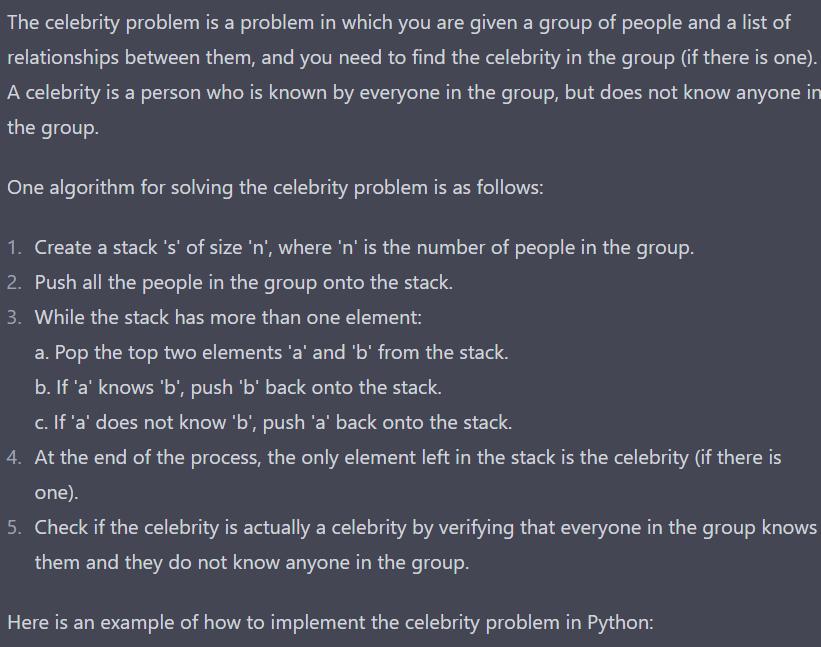

In [12]:
def find_celebrity(n, knows):
    # create a stack to store the people
    s = [i for i in range(n)]

    # while the stack has more than one element
    while len(s) > 1:
        # pop the top two elements
        a, b = s.pop(), s.pop()
        # if a knows b, push b back onto the stack
        if knows(a, b):
            s.append(b)
        # if a doesn't know b, push a back onto the stack
        else:
            s.append(a)

    # at the end of the process, the only element left in the stack is the celebrity (if there is one)
    celebrity = s[0]

    # check if the celebrity is actually a celebrity
    for i in range(n):
        if i == celebrity:
            continue
        # if anyone doesn't know the celebrity or the celebrity knows someone, return -1


# balanced parentheses checker 
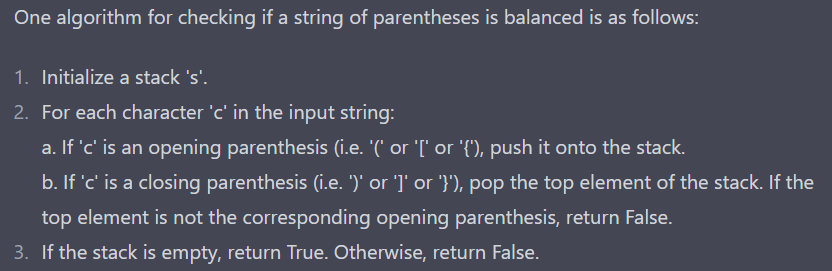

In [13]:
def is_balanced(s):
    # create a stack to store the parentheses
    stack = []

    # for each character in the input string
    for c in s:
        # if it's an opening parenthesis, push it onto the stack
        if c in ('(', '[', '{'):
            stack.append(c)
        # if it's a closing parenthesis, pop the top element of the stack
        elif c in (')', ']', '}'):
            # if the stack is empty or the top element is not the corresponding opening parenthesis, return False
            if not stack or c != {'(': ')', '[': ']', '{': '}'}[stack.pop()]:
                return False
    # if the stack is empty, return True
    return not stack

print(is_balanced("([{}])"))  # should return True
print(is_balanced("([{]}"))  # should return False


True
False
